# Predicting the amount of gold recovered from gold ore

In this project, we will use machine learning algorithms to develop a model that would predict the amount of gold recovered from gold ore.

# Contents

* [Preparing the data]()
* [Analysing the data]()    
* [Building the model]()
* [General Conclusion]()

# Preparing the data

First of all, will load the data and the libraries that we will use in this project.

In [1]:
# Loading all required libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor

In [2]:
# Loading the data files into DataFrame
df_train=pd.read_csv('/datasets/gold_recovery_train.csv')
df_test=pd.read_csv('/datasets/gold_recovery_test.csv')
df_full=pd.read_csv('/datasets/gold_recovery_full.csv')

We will display general data info and a sample of the data.

In [3]:
# printing the general/summary information about df_train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [4]:
# printing a sample of data in df_train
df_train.head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [5]:
# printing the general/summary information about df_test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [6]:
# printing a sample of data in df_test
df_test.head(10)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
5,2016-09-01 05:59:59,168.485085,8.817007,7.420000,0.791191,1402.826803,-499.299521,1401.511119,-499.205357,1404.088107,...,12.029797,-499.814895,8.036586,-500.371492,8.041446,-510.037054,4.983949,-499.990990,24.978973,-500.475640
6,2016-09-01 06:59:59,144.133440,7.924610,7.420000,0.788838,1398.252401,-499.748672,1393.255503,-499.195380,1396.738566,...,12.026296,-499.473127,8.027984,-500.983079,7.907340,-507.964971,5.010224,-500.043697,25.040709,-499.501984
7,2016-09-01 07:59:59,133.513396,8.055252,6.988000,0.801871,1401.669677,-501.777839,1400.754446,-502.514024,1400.465244,...,12.040911,-501.293852,8.020490,-499.185229,8.116897,-511.927561,5.036498,-500.149615,25.032580,-503.970657
8,2016-09-01 08:59:59,133.735356,7.999618,6.935000,0.789329,1402.358981,-499.981597,1400.985954,-496.802968,1401.168584,...,11.998184,-499.481608,8.012610,-500.896783,7.974422,-521.199104,5.061599,-499.791519,25.005063,-497.613716
9,2016-09-01 09:59:59,126.961069,8.017856,7.030000,0.805298,1400.816120,-499.014158,1399.975401,-499.570552,1401.871924,...,12.040725,-499.987743,7.989503,-499.750625,7.989710,-509.946737,5.068811,-499.293900,24.992741,-499.272255


In [7]:
# printing the general/summary information about df_full
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [8]:
# printing a sample of data in df_full
df_full.head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


All columns in all datasets seem to be of correct types, but all datasets have missing values. So, we would need to address missing values, but before doing that we will check that recovery is calculated correctly. To do this, using the training set, we will calculate recovery for the rougher.output.recovery feature. Then we will find the MAE between our calculations and the feature values.

We will calculate recovery only for rows that do not have missing values. For that, we will create a temp dataset without missing values.

In [9]:
#creating a temp dataset without missing values
temp_df_train=df_train.dropna()

In [10]:
#calculating recovery
C = temp_df_train['rougher.output.concentrate_au']
F = temp_df_train['rougher.input.feed_au']
T = temp_df_train['rougher.output.tail_au']
recovery_calculated = ((C * (F - T)) / ((F * (C - T)))) * 100

#finding the MAE between our calculations and the feature values.
mae=mean_absolute_error(temp_df_train['rougher.output.recovery'],recovery_calculated )
mae

9.460144184559453e-15

As can be seen, the MAE is close to 0. Thus, we can conclude that recovery is calculated correctly.

In addition, we observed that in comparison with the train dataset test dataset misses a lot of features. Let's check which features are missing.

In [11]:
#finding which features not available in the test set
col=(col for col in df_train.columns.tolist() if col not in df_test.columns.tolist())
list(col)

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

As can be seen, the features that are not available are output features, and the features are calculated based on other features. Therefore, these features are not needed for the model building and can be excluded from the training dataset as well.

Now we are ready to preprocess the data and address the missing values. From the documentation, we know that parameters that are next to each other in terms of time are often similar. Therefore, we will use the forward filling method for missing values and will propagate the last valid observation forward to the next valid backfill.

In [12]:
#using forward filling method to fill the missing values
df_train=df_train.fillna(method='ffill', axis=0)
df_test=df_test.fillna(method='ffill', axis=0)
df_full=df_full.fillna(method='ffill', axis=0)

Now we are ready to move to the data analysis.

# Analyzing the data

Firstly, we will check how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage. To do that, we will calculate the mean for each metal for each stage.

In [13]:
# calculating mean for each metal for each stage
concentrations = pd.DataFrame(np.array([[df_full['rougher.input.feed_au'].mean(), df_full['rougher.output.concentrate_au'].mean(), df_full['primary_cleaner.output.concentrate_au'].mean(),df_full['final.output.concentrate_au'].mean()],
                                       [df_full['rougher.input.feed_ag'].mean(), df_full['rougher.output.concentrate_ag'].mean(), df_full['primary_cleaner.output.concentrate_ag'].mean(),df_full['final.output.concentrate_ag'].mean()],
                                       [df_full['rougher.input.feed_pb'].mean(), df_full['rougher.output.concentrate_pb'].mean(), df_full['primary_cleaner.output.concentrate_pb'].mean(),df_full['final.output.concentrate_pb'].mean()]]),
                             columns=['Input', 'Rougher', 'Primary','Final'],
                             index=['au','ag','pb'])
#displaying the result
concentrations

,Input,Rougher,Primary,Final
au,7.545861,17.831509,29.119967,39.891718
ag,8.044237,10.845609,7.666972,4.768013
pb,3.282945,6.886869,8.809217,9.071366


It makes sense that the concentration of gold is growing from stage to stage. In the final stage concentration of the gold is more than 5 times higher than at the beginning of the process. The concentration of silver in the rougher stage is higher than what we had in the input. But in the later purification stages, the concentration of silver decreases. As well as the concentration of gold, the concentration of lead is growing from stage to stage.

Next, we will compare the feed particle size distributions in the training set and in the test set to ensure that the model evaluation will be incorrect.

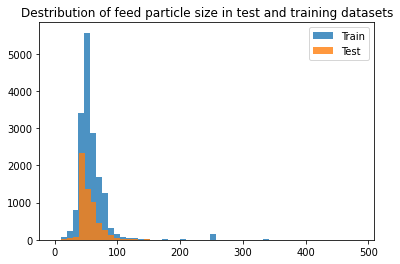

In [14]:
#plotting destribution of feed particle size in test and training datasets
plt.hist(df_train['rougher.input.feed_size'], bins=50, alpha=0.8, label='Train')
plt.hist(df_test['rougher.input.feed_size'], bins=50, alpha=0.8, label='Test')
plt.title('Destribution of feed particle size in test and training datasets')
plt.legend(loc='upper right')
plt.show()

As can be seen, the distribution of feed particle size in test and training datasets are quite similar, therefore we can assume that model evaluation will be incorrect.

Finally, before building the model. we will check the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate.

In [15]:
#calculating total concentrations of all substances at different stages in full dataset
input_total=df_full['rougher.input.feed_au']+df_full['rougher.input.feed_ag']+df_full['rougher.input.feed_pb']+df_full['rougher.input.feed_sol']
rougher_total=df_full['rougher.output.concentrate_au']+df_full['rougher.output.concentrate_ag']+df_full['rougher.output.concentrate_pb']+df_full['rougher.output.concentrate_sol']
final_total=df_full['final.output.concentrate_au']+df_full['final.output.concentrate_ag']+df_full['final.output.concentrate_pb']+df_full['final.output.concentrate_sol']

Let's plot the total concentrations.

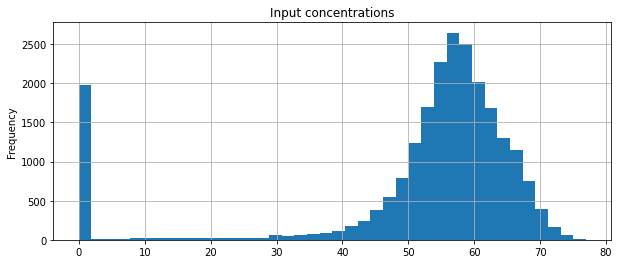

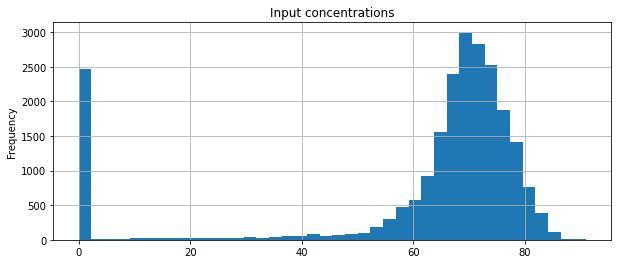

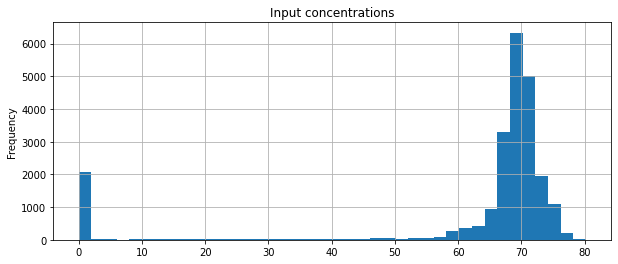

In [16]:
#plotting the total concentrations
input_total.plot(kind='hist',bins=40, figsize=(10, 4),title='Input concentrations',grid=True)
plt.show()
rougher_total.plot(kind='hist',bins=40, figsize=(10, 4),title='Input concentrations',grid=True)
plt.show()
final_total.plot(kind='hist',bins=40, figsize=(10, 4),title='Input concentrations',grid=True)
plt.show()

There are a lot of anomalies where concentrations of all substances are 0. This cannot be true, so we will drop such observations. 

We will start with the training dataset.

In [17]:
#for train dataset dropping rows there total concentrations of all substances are 0
df_train=df_train[(df_train['rougher.input.feed_au']+df_train['rougher.input.feed_ag']+df_train['rougher.input.feed_pb']+df_train['rougher.input.feed_sol'])>0]
df_train=df_train[(df_train['rougher.output.concentrate_au']+df_train['rougher.output.concentrate_ag']+df_train['rougher.output.concentrate_pb']+df_train['rougher.output.concentrate_sol'])>0]
df_train=df_train[(df_train['final.output.concentrate_au']+df_train['final.output.concentrate_ag']+df_train['final.output.concentrate_pb']+df_train['final.output.concentrate_sol'])>0]

Next, we will split the training dataset into targets and features subsets. As we sow from the comparison with the test dataset, the training dataset contains a lot of features that are not needed for the model building and can be excluded from the training dataset. Therefore, we will use the same set of features that are available in the test dataset. The only feature we don't need is the date, as it is unique for each observation.

In [18]:
#creating targets sebset for training dataset
train_targets = df_train[['rougher.output.recovery', 'final.output.recovery']]

#creating features sebset for training dataset
train_features = df_train.loc[:, list(df_test.columns)]
train_features=train_features.drop('date', axis=1)

Now, we will do the same for the test dataset. But since the test set does not have output features, we do not know which anomaly rows we need to drop. Therefore, before dropping the rows, we will merge the output data from the full dataset.

In [19]:
#setting date as temp index for full and test datasets
df_test.set_index('date', inplace=True)
df_full.set_index('date', inplace=True)

#from the full dataset, getting the subset of output features
df_full_outputs=df_full.loc[:, ['rougher.output.recovery', 'final.output.recovery', 'rougher.output.concentrate_au', 
                                'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
                                'final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
                                'final.output.concentrate_sol']]

#merging test dataset with the output sebset
df_test = df_test.merge(df_full_outputs, on = 'date')

Now, when we have output features in the test subset, we can drop anomaly observations.

In [20]:
#for test dataset dropping rows there total concentrations of all substances are 0
df_test=df_test[(df_test['rougher.input.feed_au']+df_test['rougher.input.feed_ag']+df_test['rougher.input.feed_pb']+df_test['rougher.input.feed_sol'])>0]
df_test=df_test[(df_test['rougher.output.concentrate_au']+df_test['rougher.output.concentrate_ag']+df_test['rougher.output.concentrate_pb']+df_test['rougher.output.concentrate_sol'])>0]
df_test=df_test[(df_test['final.output.concentrate_au']+df_test['final.output.concentrate_ag']+df_test['final.output.concentrate_pb']+df_test['final.output.concentrate_sol'])>0]

Next, we will split the test dataset into targets and features subsets.

In [21]:
#creating targets sebset for testing dataset
test_targets = df_test[['rougher.output.recovery', 'final.output.recovery']]
test_targets.reset_index(inplace=True,drop=True)

#creating features sebset for training dataset
test_features = df_test.loc[:, list(train_features.columns)]
test_features.reset_index(inplace=True,drop=True)

Let’s ensure that test and train feature sets have the same number of columns.

In [22]:
#printing number of features in test and train feature sets
print(test_features.shape[1])
print(train_features.shape[1])

52
52


Test and train features and targets sets are prepared, so we can move to the building of the model.

# Building the model

Before we train our models, we need a scorer to evaluate the model’s performance. We will use the sMAPE metric for our models evaluation. sMAPE is calculated as follows. 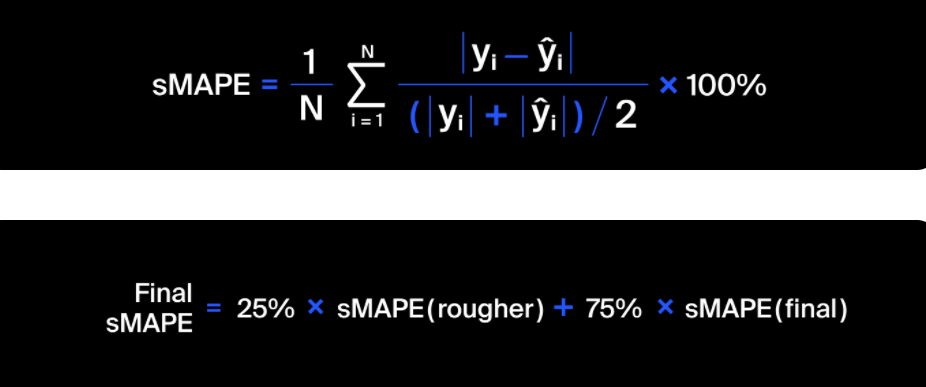

In [23]:
# writing a function to calculate the final sMAPE value
def smape(target, predicted):
    rougher=(np.mean((np.abs(target.iloc[:,0] - predicted[:, 0]) /((np.abs(target.iloc[:,0]) + np.abs(predicted[:,0])) / 2))) * 100)
    final=(np.mean((np.abs(target.iloc[:,1] - predicted[:, 1]) /((np.abs(target.iloc[:,1]) + np.abs(predicted[:,1])) / 2))) * 100)
    return rougher*0.25+final*0.75

In [24]:
# creating a scorer based on sMAPE metric
score = make_scorer(smape)

Next, we will build different regression models (LinearRegression, DecisionTree and RandomForest) and will evaluate them using cross-validation with sMAPE as a scorer. Also, for DecisionTree and RandomForest we will find the models with the best parameters. Since sMAPE evaluates model error, the lower sMAPE is better.

Firstly, we will build LinearRegression model.

In [25]:
#training LinearRegression model
model = LinearRegression()

#evaluating the model
model_score = cross_val_score(model, train_features, train_targets, scoring=score, cv=5)
print(f'sMAPE: {model_score.mean()}')

sMAPE: 12.111588335267543


Next, we will build DecisionTreeRegressor models with maximum depths in the range from 2 to 20 and will select the model with the best maximum depths.

In [26]:
#declaring variables for storing best max_depth and best sMAPE
best_max_depth=0
best_sMAPE=100

#training models with different maximum depths in range from 2 to 20
for i in range(2,20):
    model = DecisionTreeRegressor(max_depth=i, random_state=12345)
    
#evaluating the model
    model_score = cross_val_score(model, train_features, train_targets, scoring=score, cv=5)

#if sMAPE of the model is lower than previus best sMAPE, updating best max_depth and best sMAPE variables
    if model_score.mean()<best_sMAPE:
        best_max_depth=i
        best_sMAPE=model_score.mean()

#printing best sMAPE and max_depth with which this sMAPE is achieved
print(f'Best sMAPE {best_sMAPE} is achived with max_depth={best_max_depth}')    

Best sMAPE 10.447466864833737 is achived with max_depth=4


Finally, we will build RandomForestRegressor models with a different number of estimators and will select the model with the best n_estimators. We will use max_depth=4 since it was the best max_depth for the DecisonTree model trained before.

In [27]:
#declaring variables for storing best n_estimators and best sMAPE
best_n_estimators=0
best_sMAPE=100

#training models with different number of estimators
for i in range(5,30,5):
    model = RandomForestRegressor(n_estimators=i, max_depth=4, random_state = 12345)
    
#evaluating the model
    model_score = cross_val_score(model, train_features, train_targets, scoring=score, cv=5)

#if sMAPE of the model is lower than previus best sMAPE, updating best n_estimators and best sMAPE variables
    if model_score.mean()<best_sMAPE:
        best_n_estimators=i
        best_sMAPE=model_score.mean()

#printing best sMAPE and n_estimators with which this sMAPE is achieved
print(f'Best sMAPE {best_sMAPE} is achived with n_estimators={best_n_estimators}')

Best sMAPE 10.123406567885608 is achived with n_estimators=25


As can be seen, the best model is RandomForestRegressor with max_depth=4 and n_estimators=25. Let's compare our best model with a simple baseline. To do this with will use DummyRegressor with a mean strategy.

In [28]:
#creating a model
model = DummyRegressor(strategy="mean")

#evaluating the model
model_score = cross_val_score(model, train_features, train_targets, scoring=score, cv=5)
model_score.mean()

11.290758749504944

As can be seen, our best model performs better than a simple baseline.

Funally, we will use this model and perform the final test on the test sample.

In [29]:
#training the model
model = RandomForestRegressor(n_estimators=25, max_depth=4, random_state = 12345)
model.fit(train_features, train_targets)

#predicting targets for test dataset
predicted = model.predict(test_features)

#calculating sMAPE
print(f'sMAPE: {smape(test_targets, predicted)}')

sMAPE: 7.707979783916249


On the test dataset, our best model performs even better.

# General conclusion

In this project, we used machine learning algorithms to develop a model that predicted the amount of gold recovered from gold ore.

First, we observed the data and found that all datasets had missing values. Before addressing the missing values, we ensured that recovery is calculated correctly. Since we knew from the documentation that parameters that are next to each other in terms of time are often similar, we used the forward filling method for missing values.

In the next stage, we analyzed the data. We checked how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage. We found that the concentration of gold is growing from stage to stage. In the final stage concentration of the gold is more than 5 times higher than at the beginning of the process. The concentration of silver in the rougher stage is higher than what we had in the input, but in the later purification stages, the concentration of silver decreases. As well as the concentration of gold, the concentration of lead is growing from stage to stage. Also, we compared the feed particle size distributions in the training set and in the test set and found that distributions are quite similar, therefore we assumed that model evaluation will be incorrect. In addition, we checked the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. It appeared that there were a lot of anomalies where concentrations of all substances are 0. This cannot be true, so we dropped such observations. After that, we split the train and test datasets into targets and features subsets. As we sow from the comparison with the test dataset, the training dataset contained a lot of features that are not needed for the model building so we excluded those features from the training dataset. 

At the final stage, we built different regression models (LinearRegression, DecisionTree and RandomForest) and evaluated them using cross-validation with sMAPE as a scorer. The best sMAPE was achieved by RandomForestRegressor with max_depth=4 and n_estimators=25. We confirmed that our best model performs better than a simple baseline. Then, used this model and performed the final test on the test sample and it showed an even better result.